# Harris Corner Detection

In [32]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.ndimage import convolve
from math import pi, sin, cos, tan, exp

In [71]:
def plot_img(img: np.array, title :str) -> None:
    plt.title(title)
    plt.imshow(img,cmap='gray')
    plt.grid(False)
    plt.axis('off')
    plt.rcParams['figure.figsize'] = [7, 7]
    plt.show()

In [221]:
dir_path ="C:/Users/gerag/Desktop/Coursera/Fisrt Principles of Computer Vision/Features and Boundaries/Corner Detection/"
im_name = "chess.png"

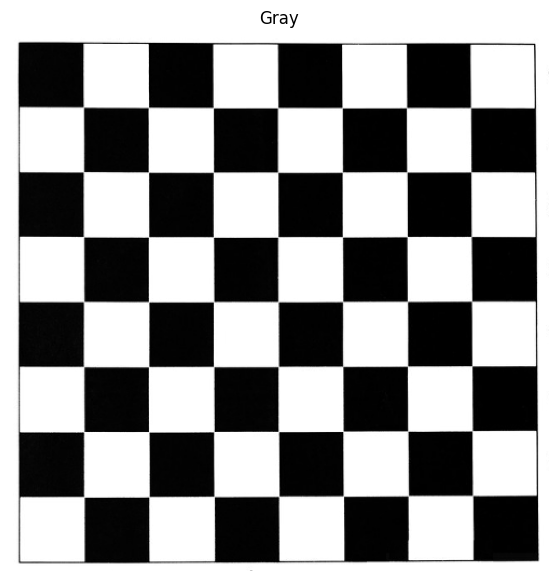

In [238]:
img_color = cv2.imread(dir_path+im_name) #Read image in grey scale
img_color = cv2.resize(img_color, (500,500), interpolation = cv2.INTER_CUBIC)
img = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)

plot_img(img,"Gray")

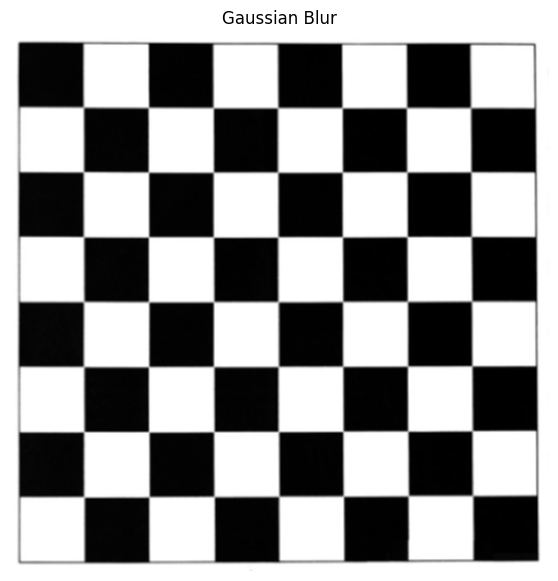

In [223]:
blurred = cv2.GaussianBlur(img,(3,3), 1)
plot_img(blurred, "Gaussian Blur")

The basic idea of algorithm is to find the difference in intensity for a displacement of (u,v) in all directions, which is expressed as below:

$$ E(u,v) = \sum_{x,y} w(x,y) \left[ I(x + u, y + v) - I(x,y) \right]^2$$

where $w(x,y)$ is the window function, $I(x + u, y + v)$ is the shifted intensity and $I(x,y)$ is the intensity

The above equation can be approximated using Tayler expansion:
$$E(u,v) \approx  \begin{bmatrix} u & v \end{bmatrix} M \begin{bmatrix} u \\ v \end{bmatrix}$$
where,
$$M = \sum_{x,y} w(x,y)   \begin{bmatrix} \frac{\partial I}{\partial x}\frac{\partial I}{\partial x} & \frac{\partial I}{\partial x}\frac{\partial I}{\partial y} \\ 
\frac{\partial I}{\partial x}\frac{\partial I}{\partial y} & \frac{\partial I}{\partial y}\frac{\partial I}{\partial y} \end{bmatrix} $$
We can find the derivatives along $x$ and $y$ by using the sobel kernel.
We can use a gaussian filter for $w$ kernel

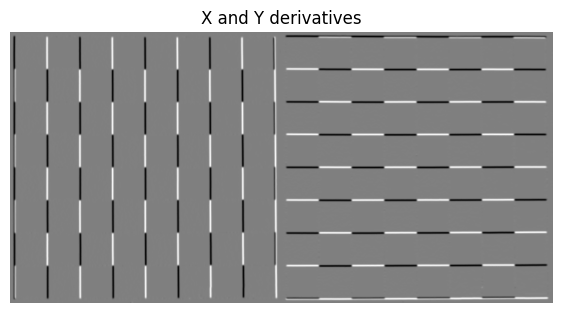

In [224]:
X_der = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=7)
Y_der = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=7)

plot_img(np.concatenate((X_der,Y_der),axis = 1), "X and Y derivatives")

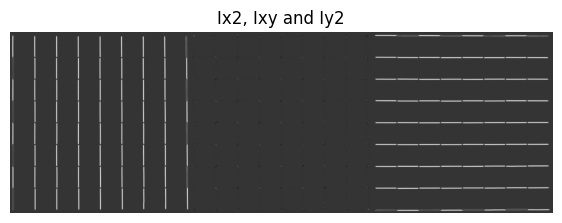

In [225]:
Ix2 = X_der * X_der
Ixy = X_der * Y_der
Iy2 = Y_der * Y_der
plot_img(np.concatenate((Ix2,Ixy,Iy2),axis = 1), "Ix2, Ixy and Iy2")

Then we finally find the Harris response R given by:
$$R = det(M) - k(trace(M))^2$$
where,
$$det(M) = AB - C^2 \hspace{0.5cm} or \hspace{0.5cm} \lambda_1 \lambda_2$$
$$trace(M) = A + B  \hspace{0.5cm} or \hspace{0.5cm} \lambda_1 + \lambda_2$$
$$ A = \frac{\partial I}{\partial x}\frac{\partial I}{\partial x}  \circledast w$$
$$ B = \frac{\partial I}{\partial y}\frac{\partial I}{\partial y}  \circledast w$$
$$ C = \frac{\partial I}{\partial x}\frac{\partial I}{\partial y}  \circledast w$$

where A, B and C are shifts of window defined by w. The lambdas are the Eigen values of M.
k is an empirically determined constant:  $k = 0.04 - 0.06$

In [226]:
def Gaussian_kernel(size :int, sigma : float, verbose = False) -> np.array: 
    k = size//2
    kernel =  np.asarray([[1/(2*pi*sigma**2) * exp( -(i**2+j**2)/(2*sigma**2)) for j in range(-k,k + 1)]  for i in range(-k,k + 1)], dtype="float32") 
    return kernel

window = Gaussian_kernel(size = 3,sigma = 1)
k = 0.05

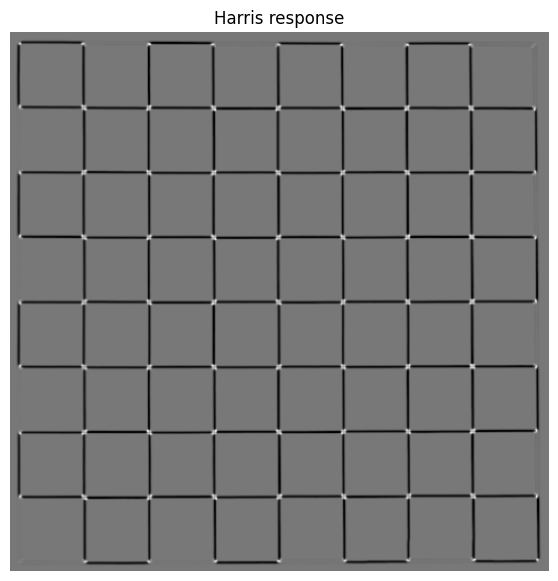

In [ ]:
A = cv2.filter2D(Ix2, -1, window)
B = cv2.filter2D(Iy2, -1, window)
C = cv2.filter2D(Ixy, -1, window)

det_M = A * B - C * C
trace_M = A + B

R = det_M - k * trace_M**2
plot_img(R, "Harris response")

#### Non-max supression algorithm

<img src="eq_1.png" 
        alt="Picture" 
        style="display: block; margin: 0 auto" />


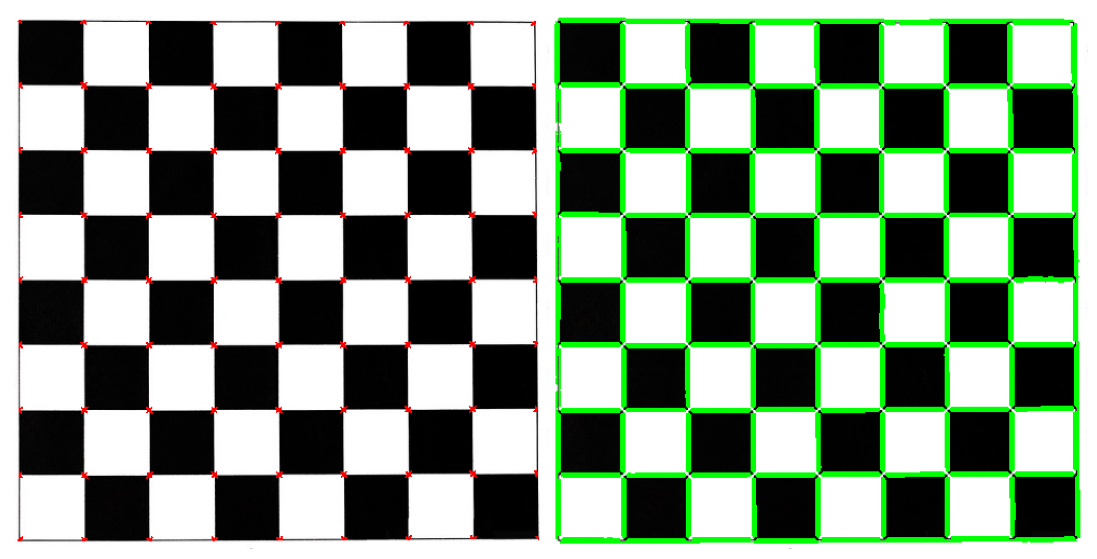

In [265]:
f,c = img.shape
color_corner = img_color.copy()
color_edge = img_color.copy()

#R = R/np.max(R) + 255

thresh = 0.01*np.max(R)

for i in range(f):
    for j in range(c):
        if R[i][j] > thresh: #Corner
            color_corner[i][j] = [0,0,255]
        elif R[i][j] < -thresh: #Edge
            color_edge[i][j] = [0,255,0]
        else:
            pass

plt.imshow( np.concatenate((cv2.cvtColor(color_corner,cv2.COLOR_BGR2RGB),cv2.cvtColor(color_edge,cv2.COLOR_BGR2RGB)),axis = 1) )
plt.grid(False)
plt.axis('off')
plt.rcParams['figure.figsize'] = [20, 7]

# Using opencv

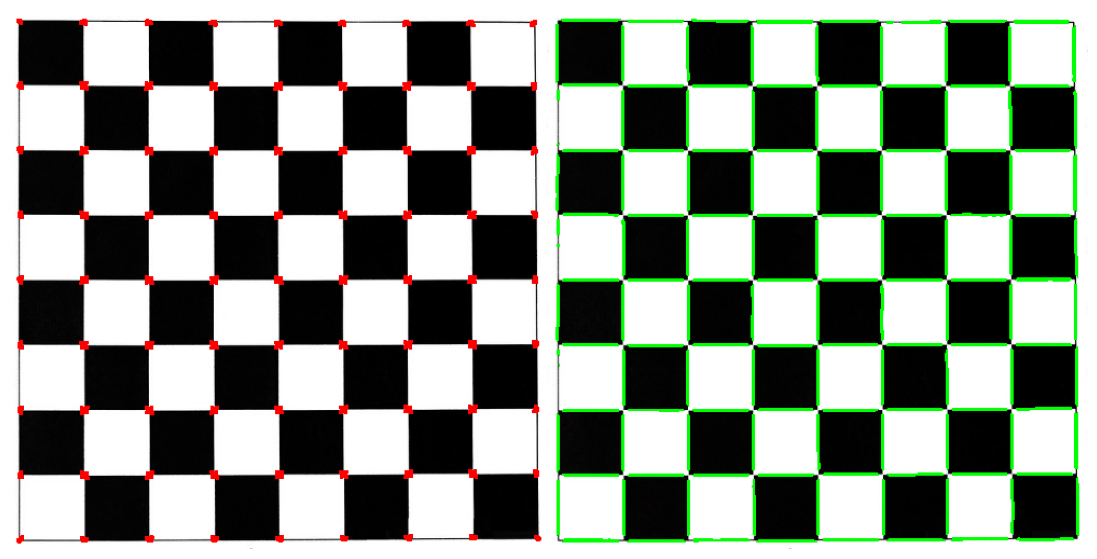

In [267]:
#img, neighborhood considered for corner detection(window size, sobel size,  Harris detector free parameter)
corners = cv2.cornerHarris(img,3,7,0.05)
corners = cv2.dilate(corners,None)

color_corner = img_color.copy()
color_edge = img_color.copy()

thresh = 0.01*np.max(corners)

for i in range(f):
    for j in range(c):
        if corners[i][j] > thresh: #Corner
            color_corner[i][j] = [0,0,255]
        elif corners[i][j] < -thresh: #Edge
            color_edge[i][j] = [0,255,0]
        else:
            pass

plt.imshow( np.concatenate((cv2.cvtColor(color_corner,cv2.COLOR_BGR2RGB),cv2.cvtColor(color_edge,cv2.COLOR_BGR2RGB)),axis = 1) )
plt.grid(False)
plt.axis('off')
plt.rcParams['figure.figsize'] = [20, 7]